<a href="https://colab.research.google.com/github/hublun/TWSApi/blob/master/IBApi_Historical_T_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_pickle('/content/drive/MyDrive/TWS/M2K20201226_to_20201231170000.pkl')

In [6]:
df["Time"] = pd.to_datetime(df["time"], format='%Y%m%d  %H:%M:%S', yearfirst=True)

In [7]:
df.drop('time', axis=1, inplace=True)

In [8]:
df["Hour"] = pd.DatetimeIndex(df["Time"]).hour
df["Minute"] = pd.DatetimeIndex(df["Time"]).minute
df["Second"] = pd.DatetimeIndex(df["Time"]).second
df["Day"] = pd.DatetimeIndex(df["Time"]).day

In [9]:
initialDateTime = df.Time[0]
initialDateTime

Timestamp('2020-12-23 18:00:00')

In [10]:
df["TradeDay"] = pd.TimedeltaIndex(df.Time - initialDateTime).days

In [11]:
 


df["dev"] = df.close - df.open
df["jump"] = df.high - df.low
df["up"] = df.dev > 5
df["down"] = df.dev < -5 


 

In [12]:
df = df[df.jump.ne(0.0)]

In [13]:
df.drop(df[df.TradeDay==0].index, inplace=True)

In [14]:
df["stdv"] = df.dev.rolling(window=60, min_periods=1).std()
df["mu"] = df.dev.ne(0).rolling(window=60, min_periods=1).mean()
df["t"] = (df.dev - df.mu) / df.stdv

In [16]:
df.TradeDay.unique()

array([4, 5, 6, 7])

In [17]:
df.drop(df.head(10*12).index, inplace=True)
df.drop(df.tail(5*12).index, inplace=True)

In [ ]:
a4_dims = (40,20)
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=a4_dims)
sns.distplot(df.pf30sec, kde=False, ax=axes[0])
sns.distplot(df.t, kde=False, ax=axes[1])
plt.show()

In [ ]:
a4_dims = (40,50)
fig, axes = plt.subplots(nrows=4,ncols=1,figsize=a4_dims)
df[(df.t <-2) & (df.TradeDay==4)].groupby(df.Hour)["pfmin"].mean().plot(kind="bar", ax=axes[0])
df[(df.t <-2) & (df.TradeDay==5)].groupby(df.Hour)["pfmin"].mean().plot(kind="bar", ax=axes[1], color="#123456")
df[(df.t <-2) & (df.TradeDay==6)].groupby(df.Hour)["pfmin"].mean().plot(kind="bar", ax=axes[2], color="#ac3489")
df[(df.t <-2) & (df.TradeDay==7)].groupby(df.Hour)["pfmin"].mean().plot(kind="bar", ax=axes[3], color="#123456")

In [ ]:
data=df[df.Hour==15]
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(x=data.Minute, y=data.t, hue=data.TradeDay, palette="cool", dashes=False, alpha=0.9)

In [ ]:
for index, row in df.iterrows():
  if row["t_val24"] > 2:
    print(row["avg"])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f130d8ec470>,
      dtype=object)

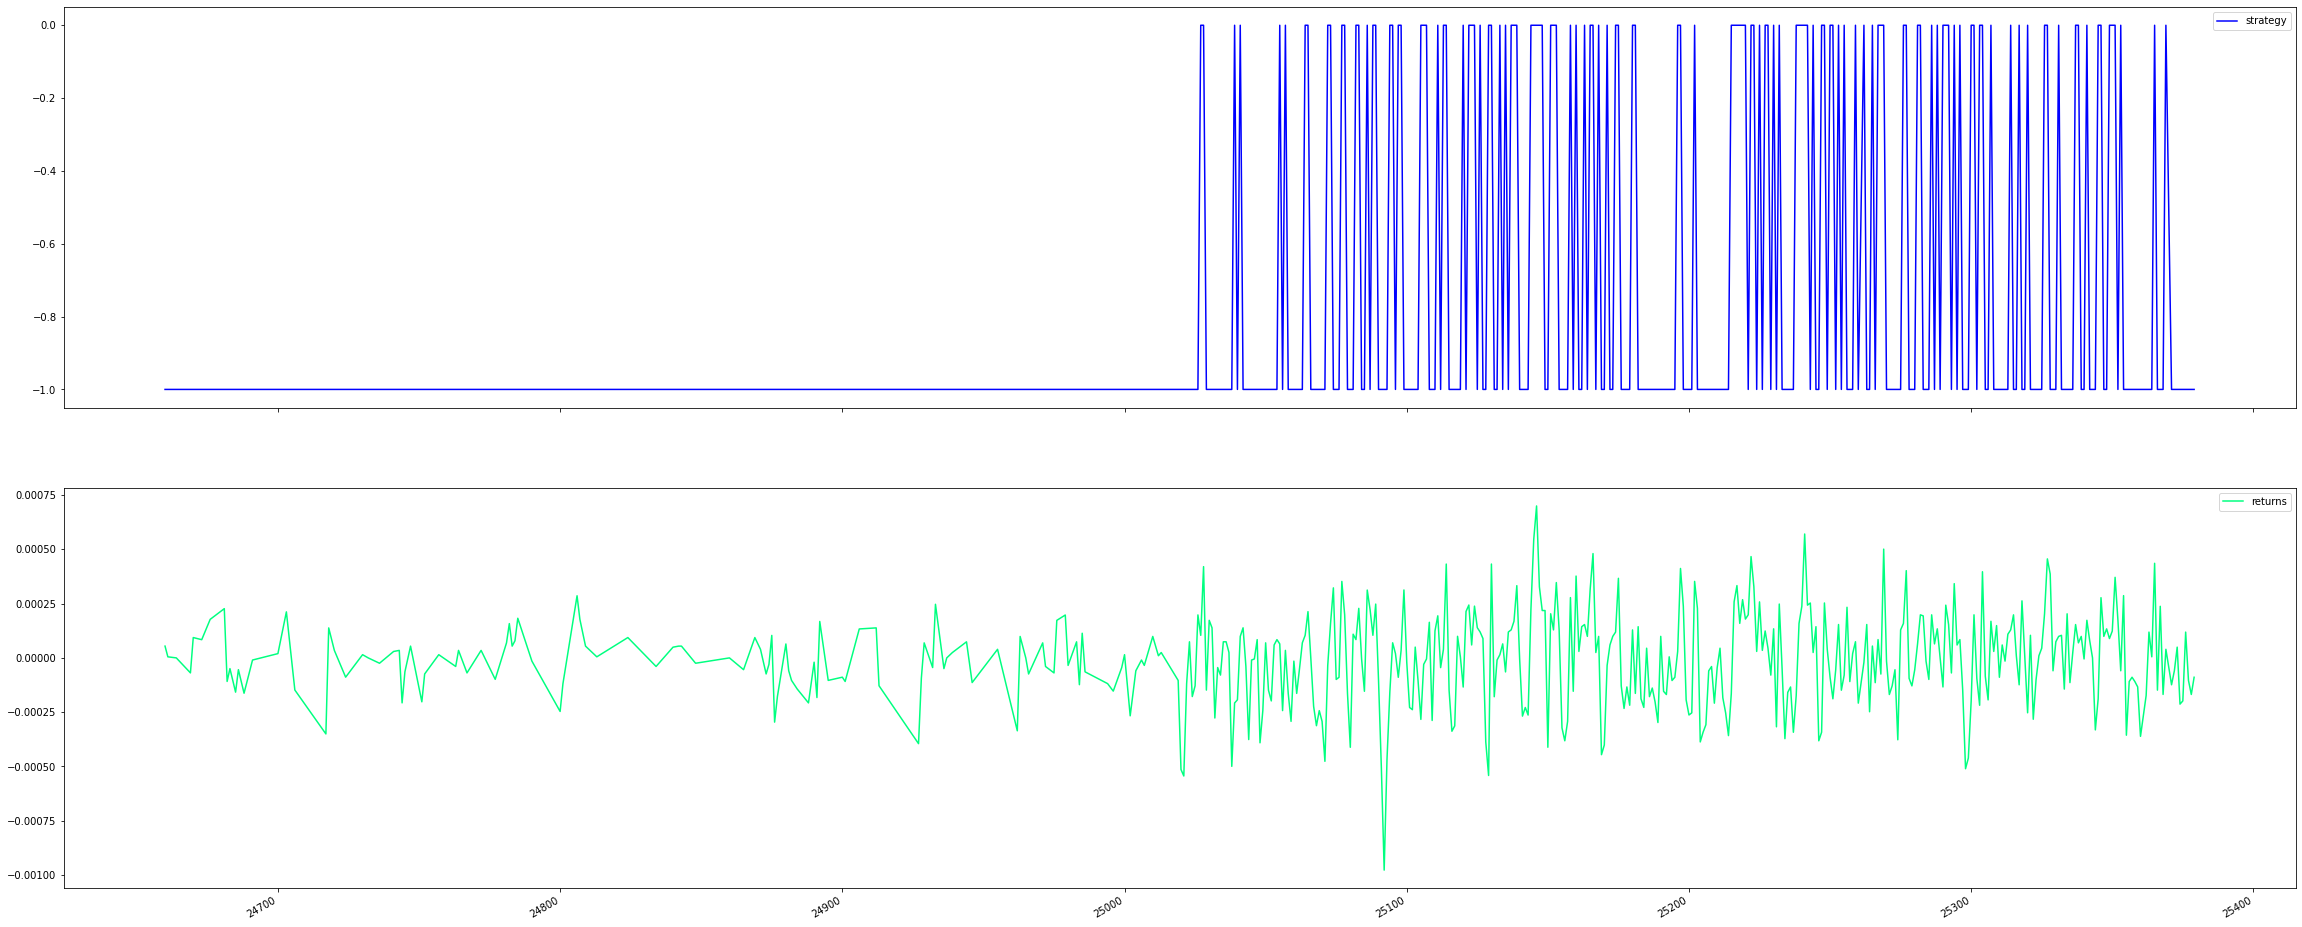

In [26]:
df[(df.TradeDay==4) & (df.Hour==9)][['strategy', 'returns']].plot(kind='line', subplots=True, use_index=True,figsize=(40,18), colormap='winter')

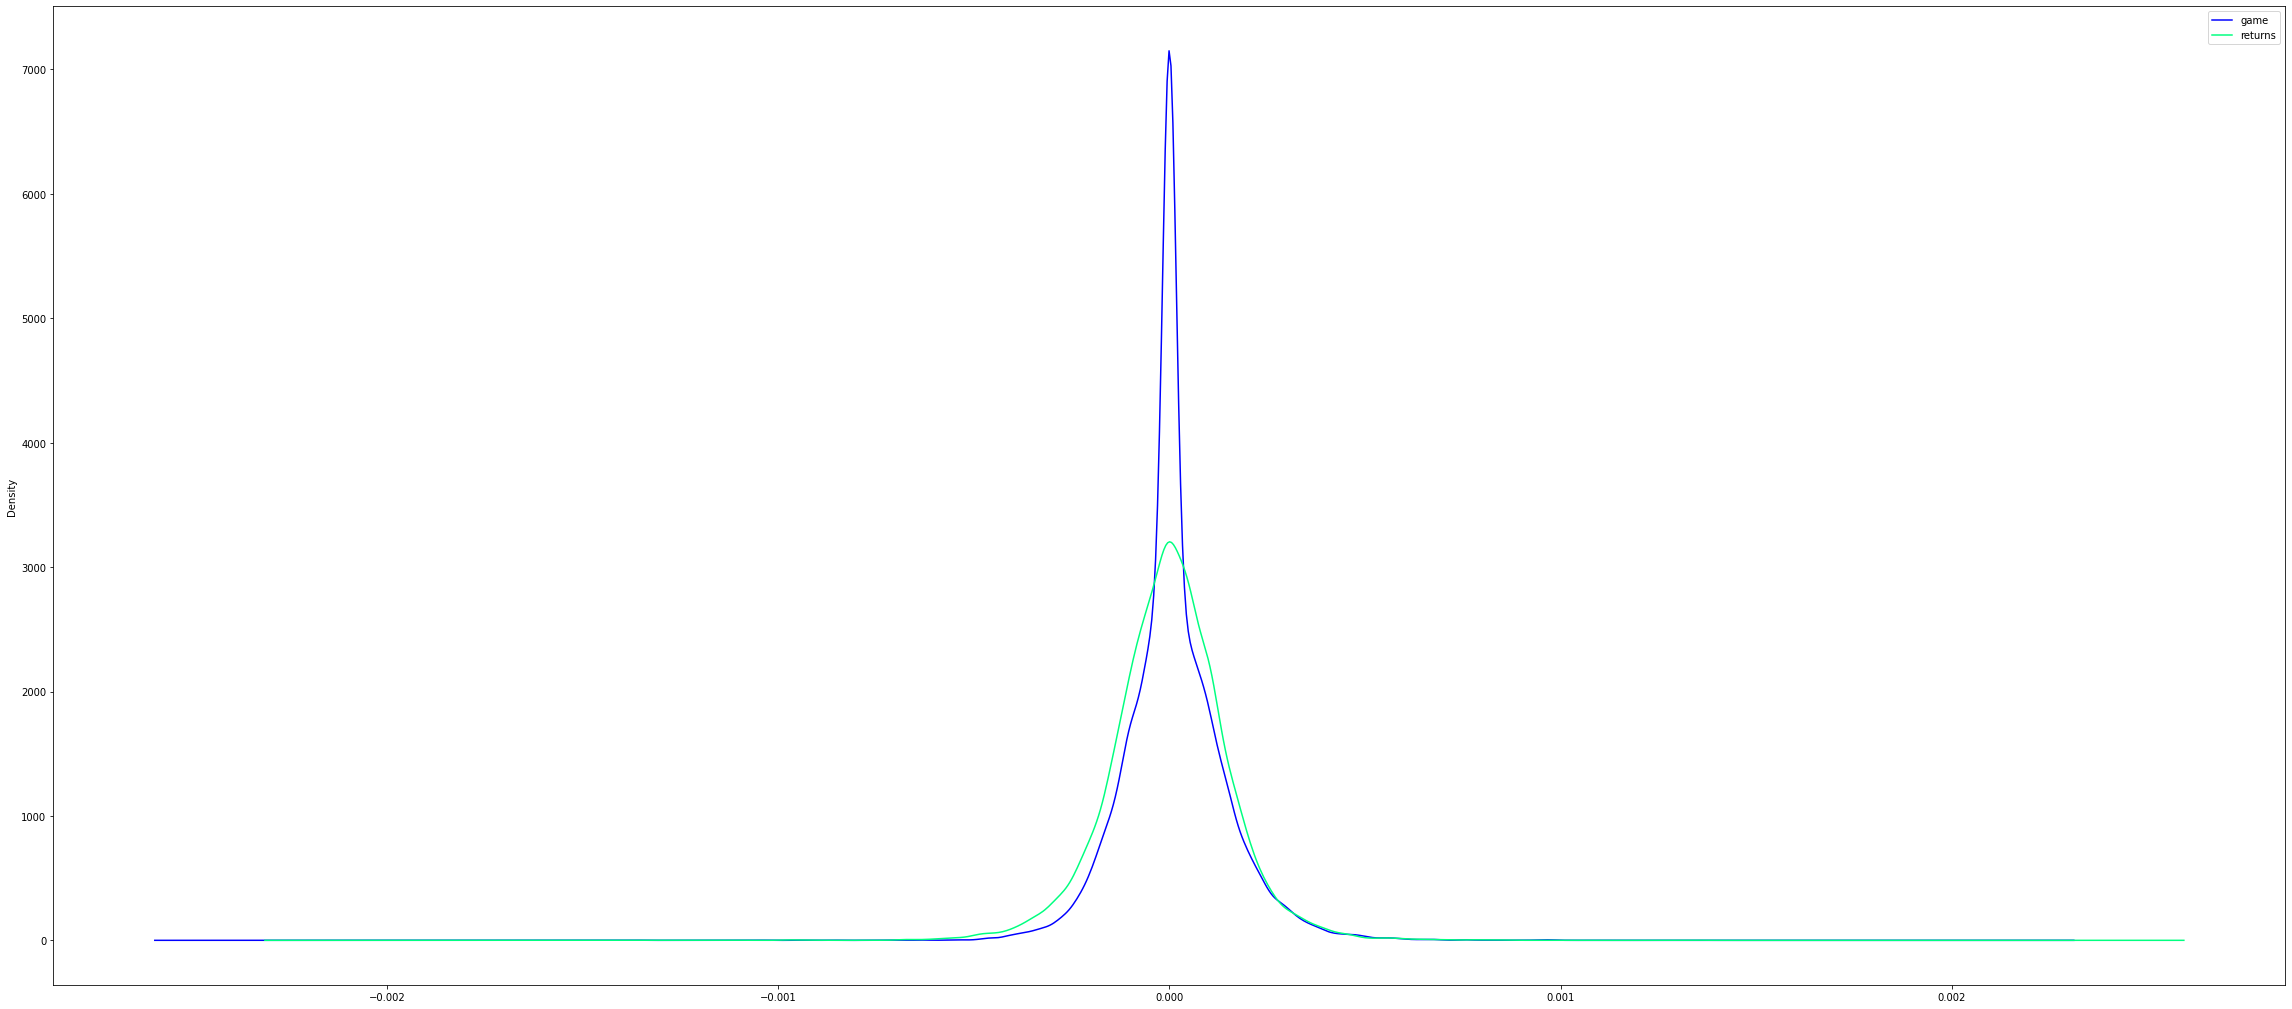

In [61]:
df[['game', 'returns']].plot(kind='kde', subplots=False, use_index=True,figsize=(40,18), colormap='winter')

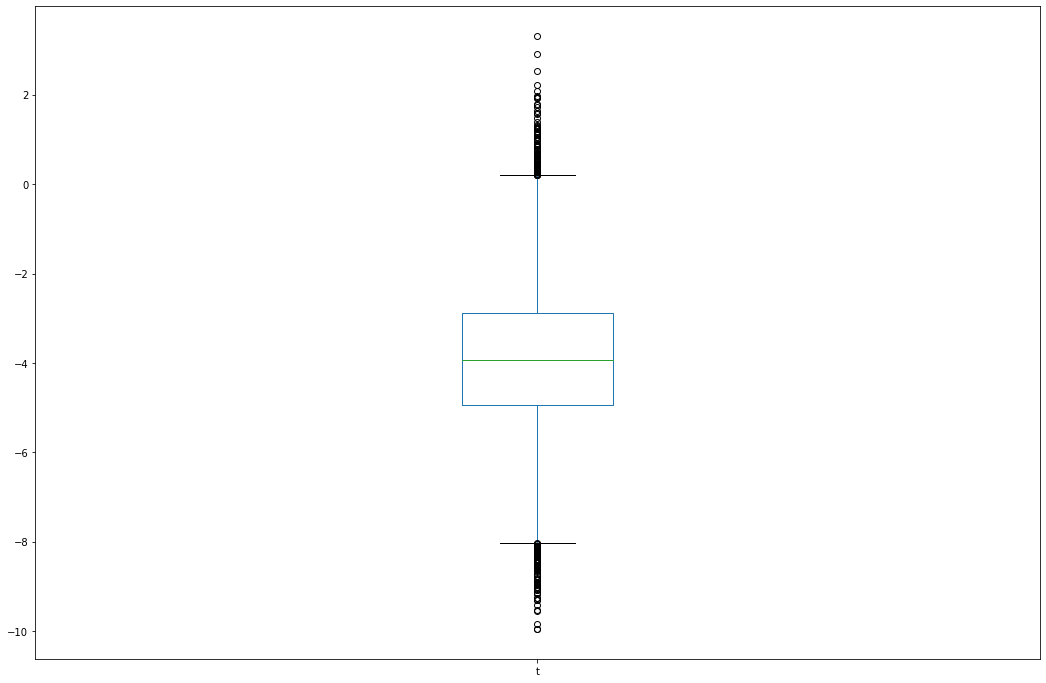

In [66]:
df.t.plot(kind='box', figsize=(18,12))

In [79]:
df['strategy']=df.t.apply(lambda x: 1 if x > -2.2 else -1 if x<-5 else 0)

In [23]:
df['returns'] = np.log(df.avg/df.avg.shift(1))

In [80]:
df['game'] = df.strategy.shift(1)*df.returns

In [81]:
df[['returns', 'game']].sum().apply(np.exp)

returns    0.987565
game       1.421245
dtype: float64

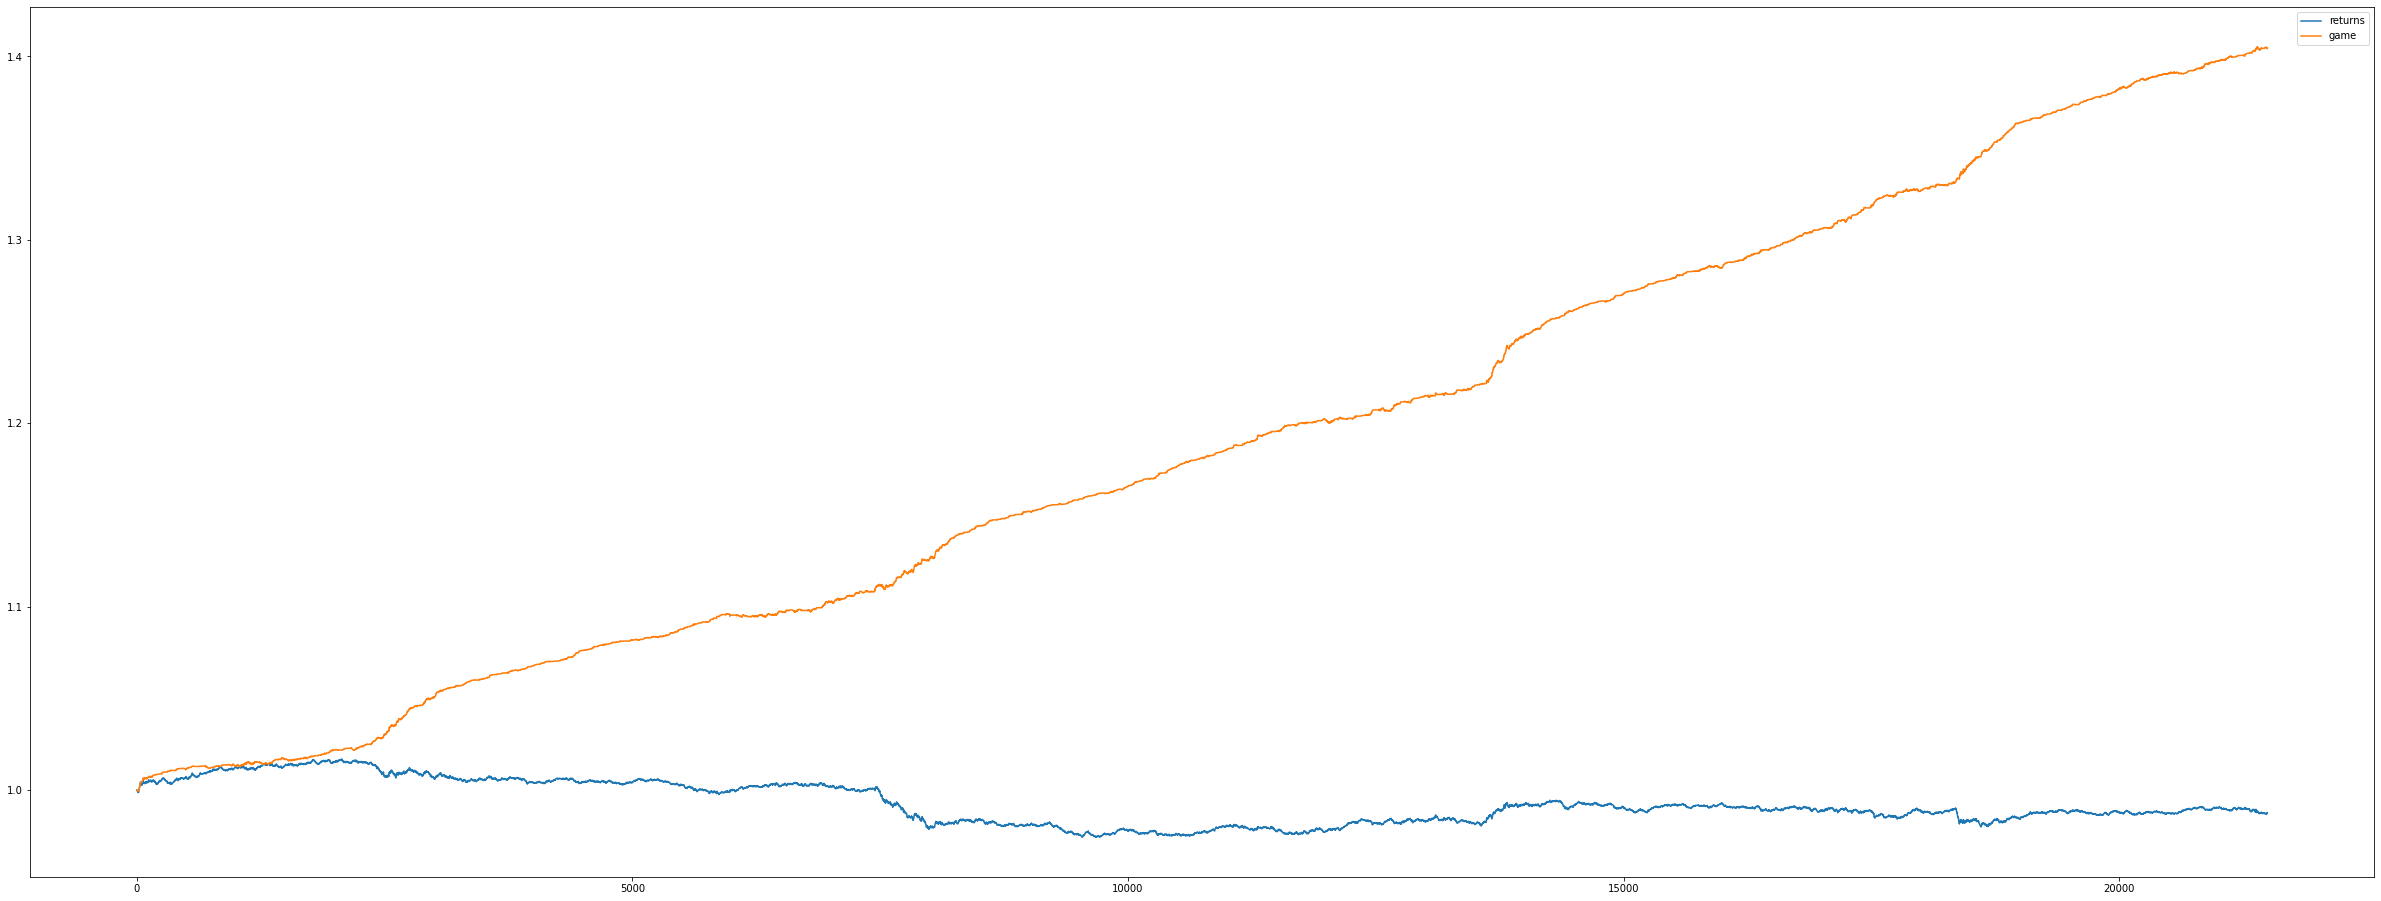

In [70]:
df[['returns','game']].cumsum().apply(np.exp).plot(figsize=(42,16), use_index=False)

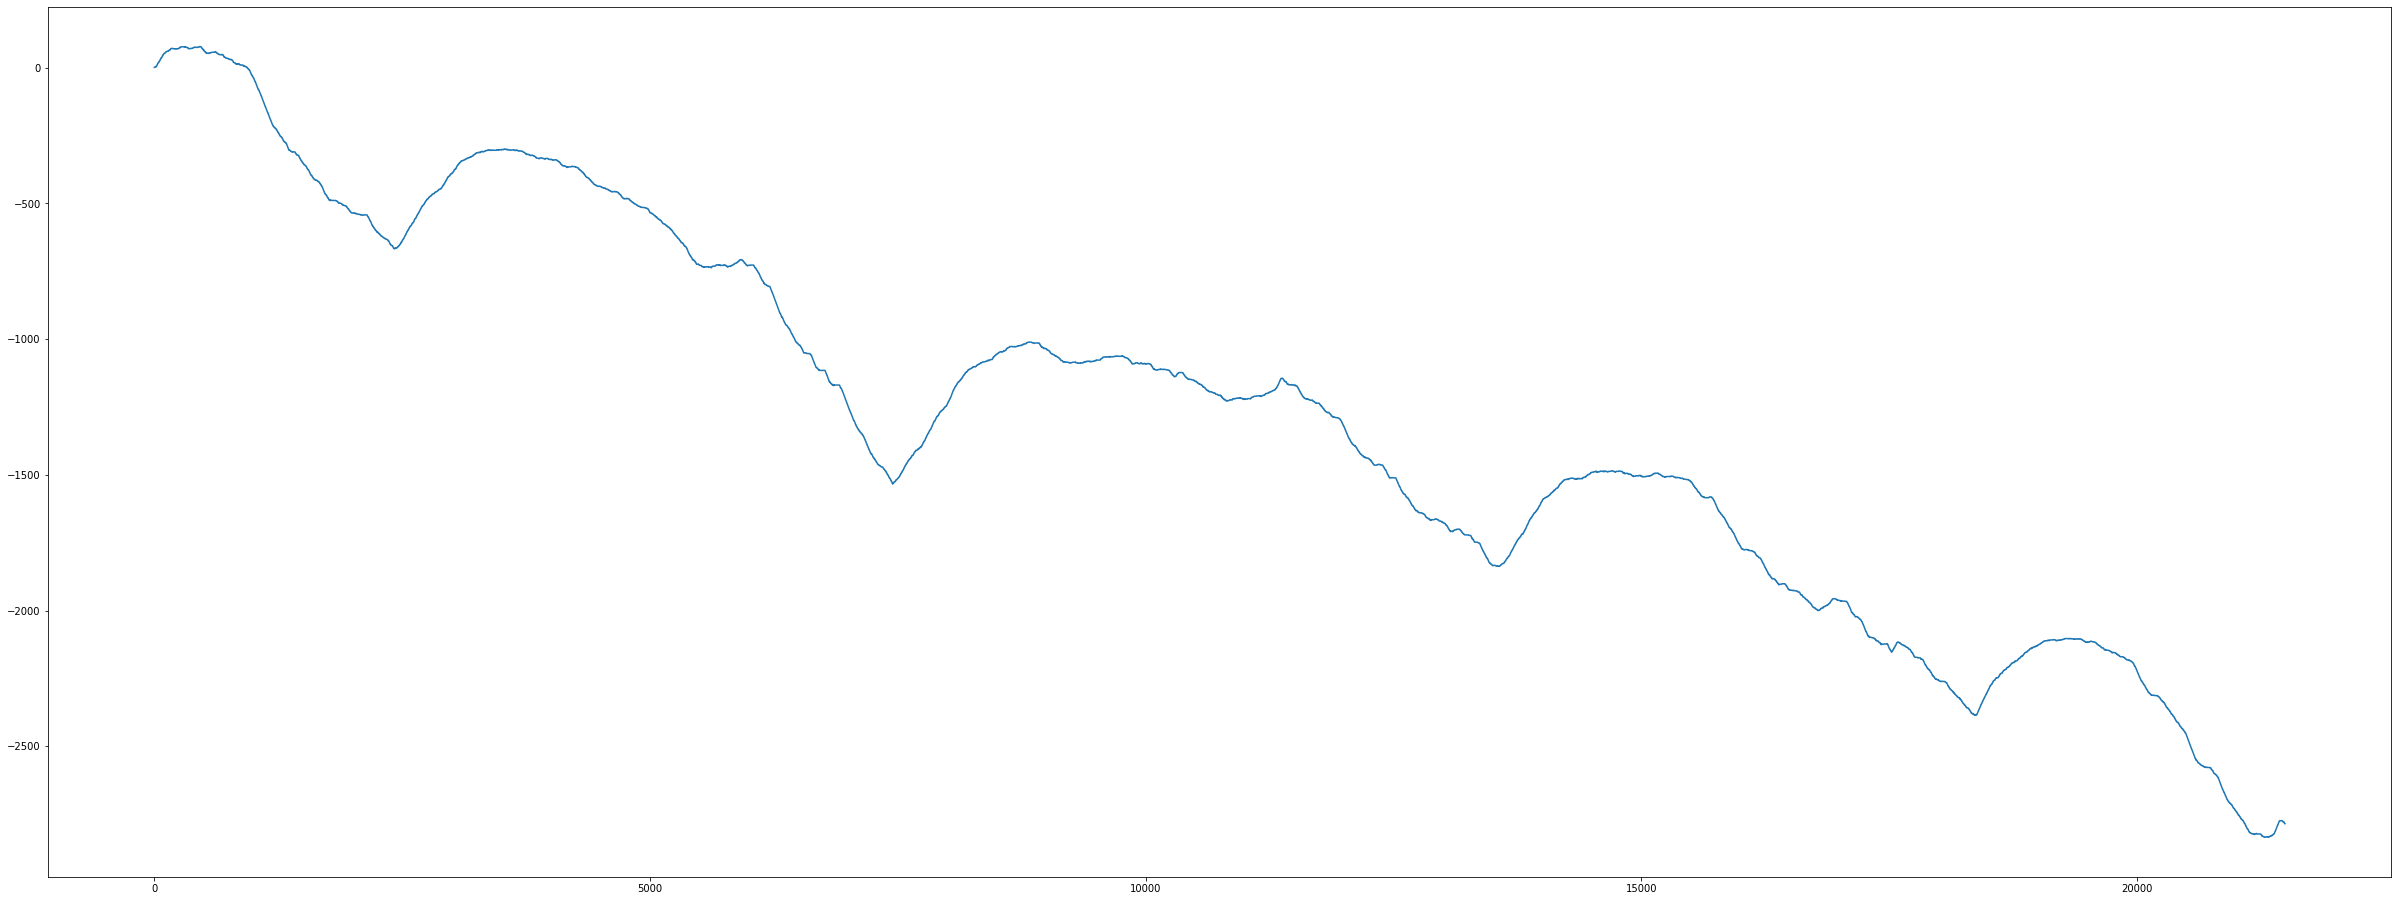

In [71]:
df.strategy.cumsum().plot(figsize=(42,16), use_index=False)

In [72]:
df.t.mean()

-3.914953197051204